In [1]:
# importing library 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading dataset 
df =pd.read_csv("D:/Lecture file/25 th lecture 29 march/10. Random Forests/Company_data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.shape
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


<bound method NDFrame.describe of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     

In [4]:
# checking null values of data
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [11]:
# data cleaning and preporcing
df['Urban']=df['Urban'].map({'Yes':1, 'No':0})
df['US']=df['US'].map({'Yes':1, 'No':0})
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [13]:
# one hot encoding for shelveloc
df =pd.get_dummies(df,columns=['ShelveLoc'],drop_first = True)
df =df.replace({True:1 ,False:0})

C:\Users\ZORO\AppData\Local\Temp\ipykernel_4460\3309670968.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df =df.replace({True:1 ,False:0})


In [15]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,1,1,0,1
398,5.94,100,79,7,284,95,50,12,1,1,0,0


## EDA

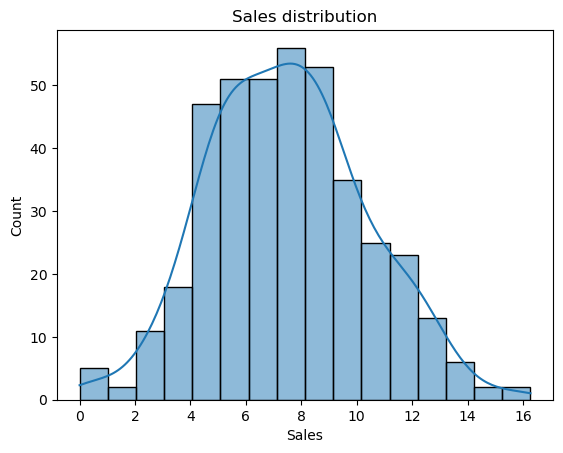

In [18]:
# sales distribution
sns.histplot(df['Sales'],kde =True)
plt.title('Sales distribution')
plt.show()

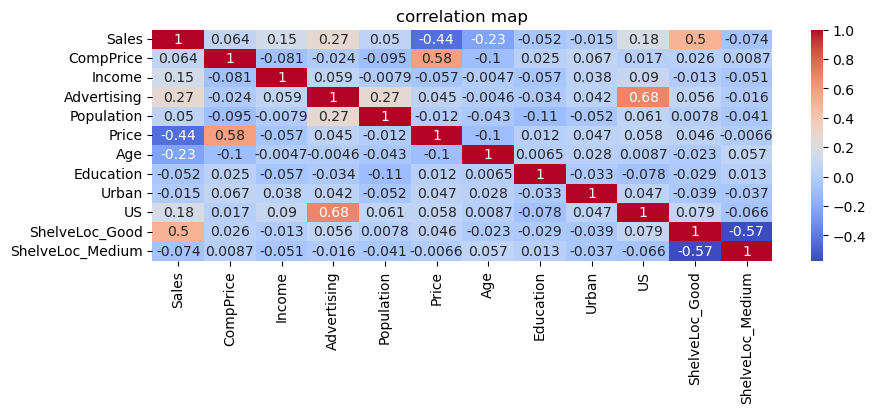

In [20]:
# correlation map 
plt.figure(figsize= (10 ,3))
sns.heatmap(df.corr(),annot=True ,cmap ='coolwarm')
plt.title("correlation map")
plt.show()

In [21]:
## model triaining 
from sklearn.model_selection import train_test_split

X =df.drop("Sales" ,axis =1)
y =df["Sales"]

X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2 ,random_state =42)


In [29]:
## linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_squared_error

lr =LinearRegression()
lr.fit(X_train ,y_train)

y_pred_lr =lr.predict(X_test)

r2_Score = r2_score(y_test ,y_pred_lr)
RMSE =np.sqrt(mean_squared_error(y_test ,y_pred_lr))
print(f'r2 score of company data is :{r2_Score}')
print(f'RMSE of company data is :{RMSE}')

r2 score of company data is :0.8892712759554212
RMSE of company data is :1.0468017357559332


In [35]:
## decision tree 
from sklearn.tree import DecisionTreeRegressor

Dt = DecisionTreeRegressor()
Dt.fit(X_train ,y_train)

y_pred_Dt =Dt.predict(X_test)

r2_Dt = r2_score(y_test ,y_pred_Dt)
RMSE_DT =np.sqrt(mean_squared_error(y_test ,y_pred_Dt))
print(f'r2 score of company data is :{r2_Dt}')
print(f'RMSE of company data is :{RMSE_DT}')

r2 score of company data is :0.32288913241419037
RMSE of company data is :2.5885954203003605


In [33]:
# random forrest 

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor( n_estimators=200,random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'r2 score of company data is :{r2_rf}')
print(f'RMSE of company data is :{r2_rf}')

(0.6879409212996432, 1.7573274680338447)